In [ ]:
# Phase 1: Problem Understanding and Data Exploration
## SW485 - Machine Learning Project
### Medical Diagnosis System

**Group Members:**
- Shahad Alsabui - ID: 444
- Sarah Alomran - ID: 444200911
- Reem Al Mutlaq - ID: 444200533
- Shadn Alsaif - ID: 443201150
- Mashael Albgomi - ID: 44202218


**Date:** October 2025

In [ ]:
---
## Import Libraries and loadind the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
print("Libraries imported successfully")

Libraries imported successfully


In [2]:
df = pd.read_csv('Dataset\Final_Augmented_dataset_Diseases_and_Symptoms.csv\Final_Augmented_dataset_Diseases_and_Symptoms.csv')

print("Dataset loaded successfully")
print(f"Shape: {df.shape}")

Dataset loaded successfully
Shape: (246945, 378)


In [ ]:
---
## Section 1: Dataset Goal & Source

### Dataset Information

**Goal**
This dataset is used to build a disease prediction system that can:
1. Identify potential diseases based on patient symptoms
2. Recommend appropriate medical specialists
3. Provide preliminary diagnostic guidance

**Source:**
[Kaggle - Diseases and Symptoms Dataset](https://www.kaggle.com/datasets/dhivyeshrk/diseases-and-symptoms-dataset)

**Application Domain:** Healthcare - Medical Diagnosis

**Purpose:**
- Early disease detection
- Reducing diagnostic time
- Improving patient outcomes
- Optimizing healthcare resource allocation

In [ ]:
---
## Section 2: General Information

In [ ]:

print("1. DATASET'S GENERAL INFORMATION")
print("="*70)

# Dataset informarion
print(f"\n1.1 Dataset Dimensions:")
print(f"   - Number of observations (rows): {df.shape[0]}")
print(f"   - Number of features (columns): {df.shape[1]}")

DATASET'S GENERAL INFORMATION

1. Dataset Dimensions:
   - Number of observations (rows): 246945
   - Number of features (columns): 378


In [ ]:
## Section 3: Column names and data

In [ ]:
print(f"\n1.2 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")


2. Column Names:
   1. diseases
   2. anxiety and nervousness
   3. depression
   4. shortness of breath
   5. depressive or psychotic symptoms
   6. sharp chest pain
   7. dizziness
   8. insomnia
   9. abnormal involuntary movements
   10. chest tightness
   11. palpitations
   12. irregular heartbeat
   13. breathing fast
   14. hoarse voice
   15. sore throat
   16. difficulty speaking
   17. cough
   18. nasal congestion
   19. throat swelling
   20. diminished hearing
   21. lump in throat
   22. throat feels tight
   23. difficulty in swallowing
   24. skin swelling
   25. retention of urine
   26. groin mass
   27. leg pain
   28. hip pain
   29. suprapubic pain
   30. blood in stool
   31. lack of growth
   32. emotional symptoms
   33. elbow weakness
   34. back weakness
   35. pus in sputum
   36. symptoms of the scrotum and testes
   37. swelling of scrotum
   38. pain in testicles
   39. flatulence
   40. pus draining from ear
   41. jaundice
   42. mass in scrotum
   43.

In [ ]:
print(f"\n1.3 Data Types:")
print(df.dtypes)


3. Data Types:
diseases                            object
anxiety and nervousness              int64
depression                           int64
shortness of breath                  int64
depressive or psychotic symptoms     int64
                                     ...  
hip weakness                         int64
back swelling                        int64
ankle stiffness or tightness         int64
ankle weakness                       int64
neck weakness                        int64
Length: 378, dtype: object


In [ ]:
# Common names: 'Disease', 'disease', 'prognosis', 'Disease_Name'
if 'Diseases' in df.columns:
    target_col = 'Diseases'
elif 'diseases' in df.columns:
    target_col = 'diseases'
elif 'prognosis' in df.columns:
    target_col = 'prognosis'
else:
    print("Available columns:")
    print(df.columns.tolist())
    target_col = df.columns[-1]  # Assume last column
    print(f"\nAssuming target column is: {target_col}")

print(f"\n1.4 Target Variable: '{target_col}'")
print("\nThe repetation of diseases in the dataset deontes the cases\nof patients diagnosed with the disease in this dataset.\nIt is demonstrated by this analysis that some diseses\nare more prevalent than others.\n\n")
print(f"- Number of unique diseases: {df[target_col].nunique()}")
print(f"- Disease distribution:\n")
print(df[target_col].value_counts())


4. Target Variable: 'diseases'

The repetation of diseases in the dataset deontes the cases
of patients diagnosed with the disease in this dataset.
It is demonstrated by this analysis that some diseses
are more prevalent than others.


- Number of unique diseases: 773
- Disease distribution:

diseases
cystitis                          1219
nose disorder                     1218
vulvodynia                        1218
complex regional pain syndrome    1217
spondylosis                       1216
                                  ... 
open wound of the head               1
myocarditis                          1
chronic ulcer                        1
hypergammaglobulinemia               1
kaposi sarcoma                       1
Name: count, Length: 773, dtype: int64


In [ ]:
print(f"\n2. Statistical summaries:")
print("\n2.1. DISEASE DISTRIBUTION TABLE")
print("-"*70)
disease_counts = df[target_col].value_counts().sort_values(ascending=False)

# Create DataFrame for better display - Disease, Rank, Patient_Count order
disease_table = pd.DataFrame({
    'Disease': disease_counts.index,
    'Rank': range(1, len(disease_counts) + 1),
    'Patient_Case_ount': disease_counts.values
})

# Display full table
print(disease_table.to_string(index=False))

# Summary statistics
print(f"\n" + "="*70)
print("DISEASE DISTRIBUTION SUMMARY:")
print(f"  - Total unique diseases: {len(disease_counts)}")
print(f"  - Total patient cases: {disease_counts.sum():,}")
print(f"  - Mean cases per disease: {disease_counts.mean():.2f}")
print(f"  - Median cases per disease: {disease_counts.median():.2f}")
print(f"  - Std deviation: {disease_counts.std():.2f}")
print(f"  - Range: {disease_counts.min()} to {disease_counts.max()} cases")
print(f"  - Imbalance ratio: {disease_counts.max() / disease_counts.min():.2f}:1")
print("="*70)
print(f"\nThis table indicates clear imbalance ratio as mentioned above.")


5. Statistical summaries:

5.1. DISEASE DISTRIBUTION TABLE
----------------------------------------------------------------------
                                                 Disease  Rank  Patient_Case_ount
                                                cystitis     1               1219
                                           nose disorder     2               1218
                                              vulvodynia     3               1218
                          complex regional pain syndrome     4               1217
                                             spondylosis     5               1216
                                            vaginal cyst     6               1215
                                             esophagitis     7               1215
                               peripheral nerve disorder     8               1215
                                            hypoglycemia     9               1215
                           conjunctivitis due to 

In [ ]:
# ============================================================
# TABLE 2: SYMPTOM STATISTICS
# ============================================================
print("\n2.2 SYMPTOM STATISTICS TABLE")
print("="*70)

# Get symptom columns (exclude disease column)
symptom_cols = [col for col in df.columns if col != target_col]

# Calculate statistics for each symptom
symptom_stats = pd.DataFrame({
    'Symptom': symptom_cols,
    'Count(Symptom releavnce)': df[symptom_cols].sum().values,  # Number of 1s
    'Mean': df[symptom_cols].mean().values,           # Proportion (mean)
    'Variance': df[symptom_cols].var().values         # Variance
})

# Sort by count (most common first)
symptom_stats = symptom_stats.sort_values('Count(Symptom releavnce)', ascending=False).reset_index(drop=True)

# Add percentage column
symptom_stats['Percentage'] = (symptom_stats['Mean'] * 100).round(2)

# Reorder columns
symptom_stats = symptom_stats[['Symptom', 'Count(Symptom releavnce)', 'Percentage', 'Mean', 'Variance']]

# Display full table
print(symptom_stats.to_string(index=False))

# Summary statistics
print(f"\n" + "="*70)
print("SYMPTOM STATISTICS SUMMARY:")
print(f"  - Total symptoms tracked: {len(symptom_stats)}")
print(f"  - Average count per symptom: {symptom_stats['Count(Symptom releavnce)'].mean():.2f}")
print(f"  - Median count per symptom: {symptom_stats['Count(Symptom releavnce)'].median():.2f}")
print(f"  - Average mean (proportion): {symptom_stats['Mean'].mean():.4f} ({symptom_stats['Percentage'].mean():.2f}%)")
print(f"  - Average variance: {symptom_stats['Variance'].mean():.4f}")
print(f"\n  - Most common symptom: {symptom_stats.iloc[0]['Symptom']}")
print(f"    Count: {symptom_stats.iloc[0]['Count(Symptom releavnce)']:.0f} ({symptom_stats.iloc[0]['Percentage']:.2f}%)")
print(f"  - Least common symptom: {symptom_stats.iloc[-1]['Symptom']}")
print(f"    Count: {symptom_stats.iloc[-1]['Count(Symptom releavnce)']:.0f} ({symptom_stats.iloc[-1]['Percentage']:.2f}%)")
print("="*70)
print("The imbalance in symptom occurrence is evident from the statistics above, indicating that some symptoms are much more prevalent among patients than others.\nWe belive that the imbalance is norman and logical.\nWe will be deleting symptoms that are not related to any case.")


5.2 SYMPTOM STATISTICS TABLE
                                       Symptom  Count(Symptom releavnce)  Percentage     Mean  Variance
                          sharp abdominal pain                     32307       13.08 0.130827  0.113712
                                      vomiting                     27874       11.29 0.112875  0.100135
                                      headache                     24719       10.01 0.100099  0.090080
                                         cough                     24296        9.84 0.098386  0.088707
                              sharp chest pain                     24016        9.73 0.097252  0.087795
                                        nausea                     23687        9.59 0.095920  0.086720
                                     back pain                     21809        8.83 0.088315  0.080516
                           shortness of breath                     21346        8.64 0.086440  0.078969
                                  

In [12]:
##Visualization

In [ ]:
print("3. Summary & Visualization")
print("\n" + "="*70)
print("3.1 MISSING VALUES ANALYSIS")

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print("\nMissing Values Summary:")
if len(missing_df) > 0:
    display(missing_df)
else:
    print("✓ No missing values found!")

6. Summary & Visualization

6.1 MISSING VALUES ANALYSIS

Missing Values Summary:
✓ No missing values found!


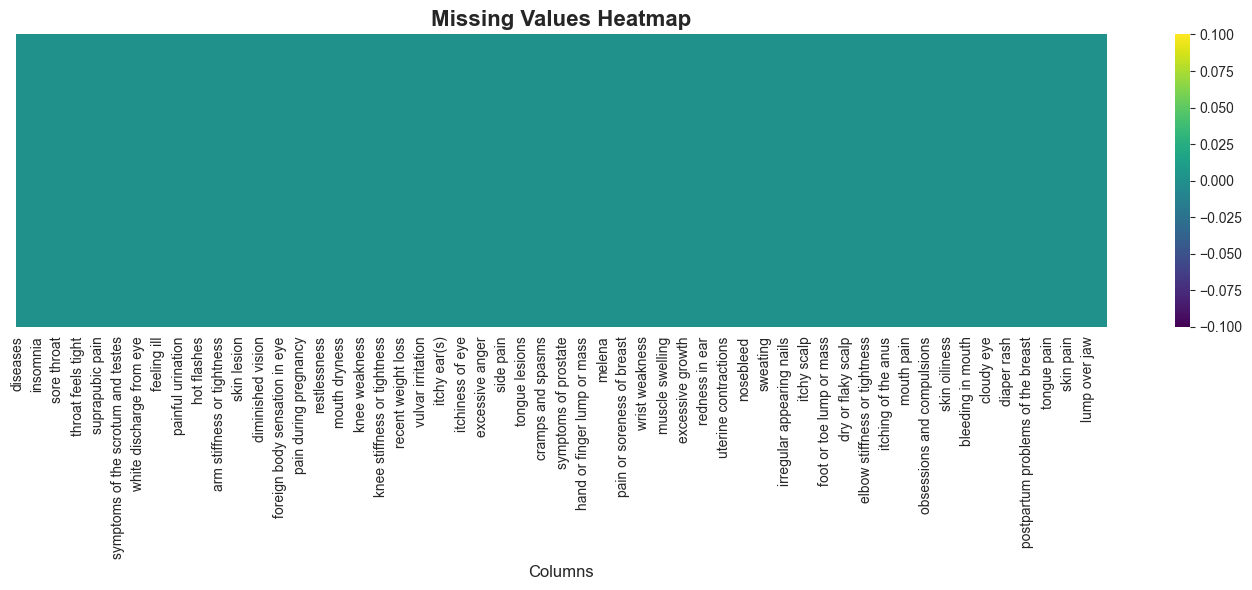

In [15]:
# Visualize missing values
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=12)
plt.tight_layout()
plt.show()


6.2 VISUALIZATIONS: DISEASE IMBALANCE & SYMPTOM MEAN

6.2.1 Visualizing Disease Distribution...


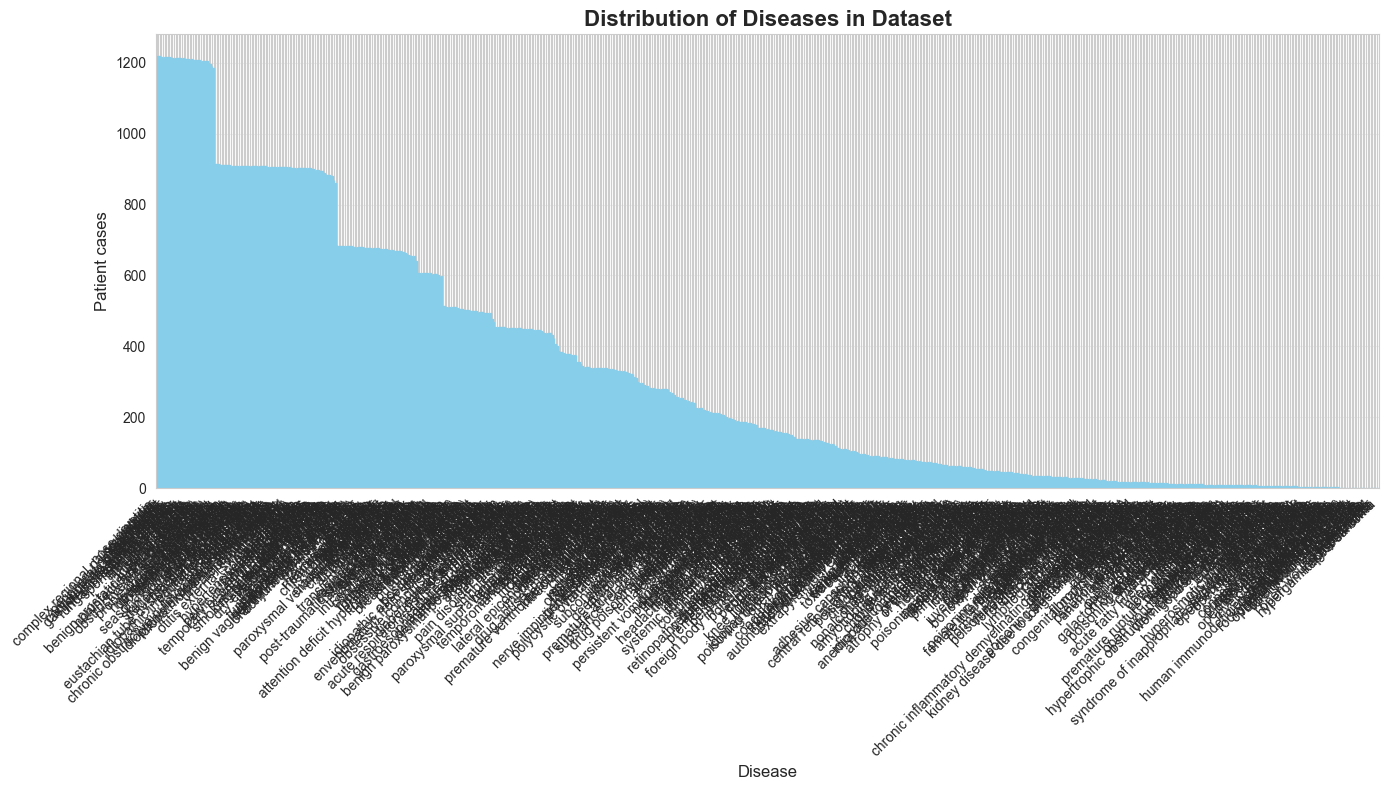

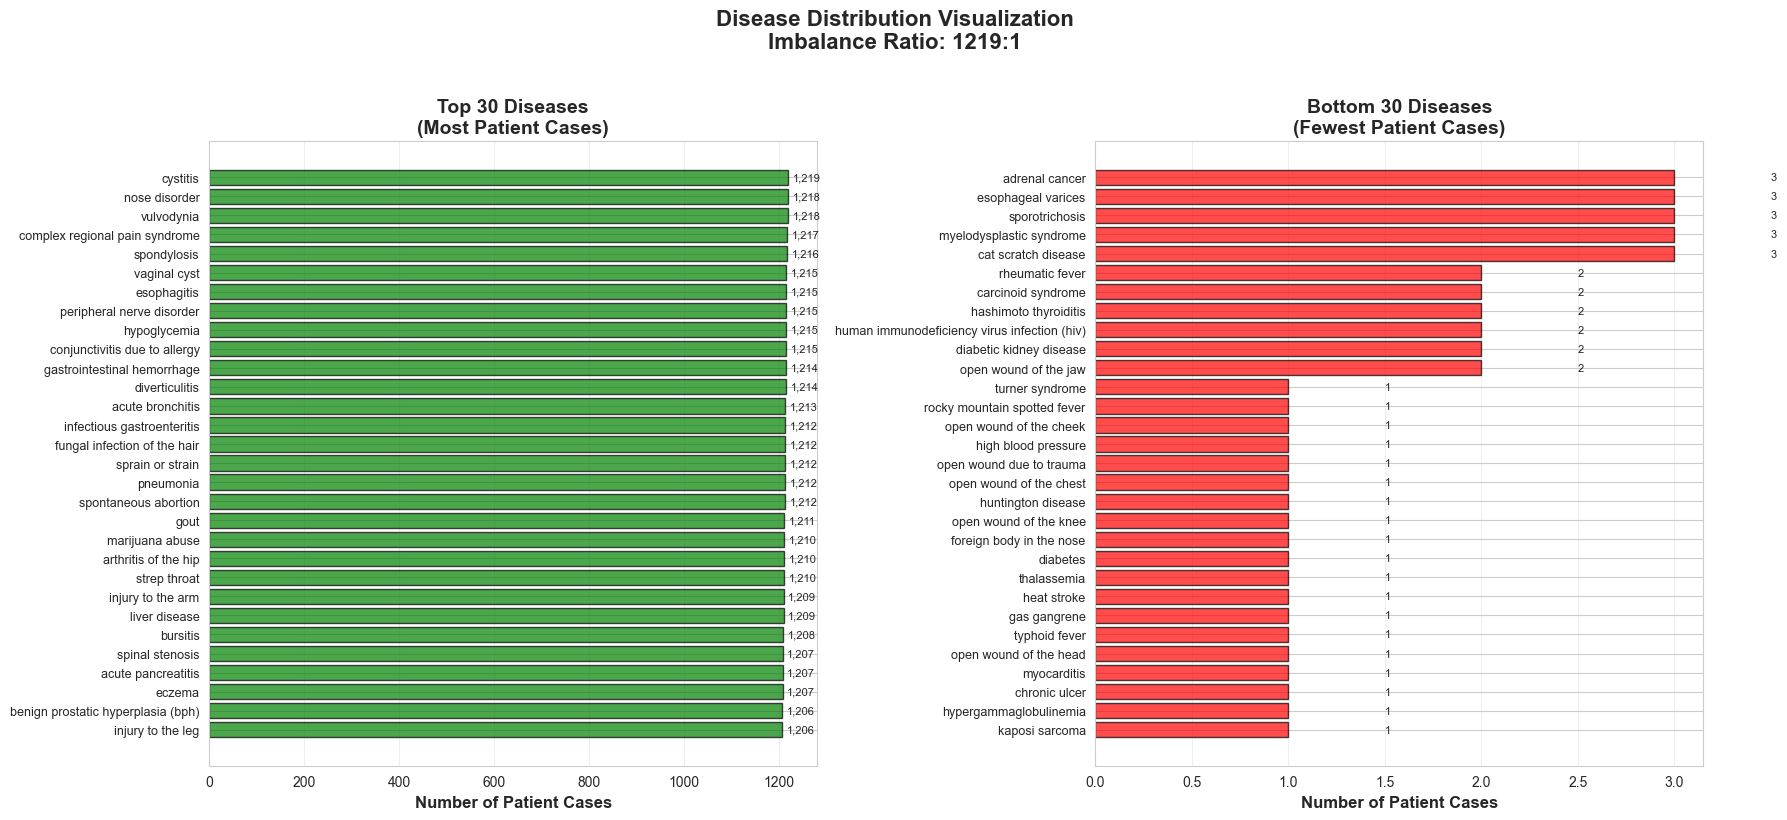

✓ Disease Distribution visualization complete
  Imbalance ratio: 1219:1


In [ ]:
print("\n" + "="*70)
print("3.2 VISUALIZATIONS: DISEASE IMBALANCE & SYMPTOM MEAN")
print("="*70)

# ============================================================
# VISUALIZATION 1: DISEASE IMBALANCE - Top 30 & Bottom 30
# ============================================================

print("\n3.2.1 Visualizing Disease Distribution...")
# Plot class distribution
plt.figure(figsize=(14, 8))
disease_counts.plot(kind='bar', color='skyblue', edgecolor='skyblue')
plt.title('Distribution of Diseases in Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Patient cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

disease_counts = df[target_col].value_counts().sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Top 30 diseases (most patient cases)
top_30 = disease_counts.head(30)
ax1.barh(range(len(top_30)), top_30.values, color='green', edgecolor='black', alpha=0.7)
ax1.set_yticks(range(len(top_30)))
ax1.set_yticklabels(top_30.index, fontsize=9)
ax1.set_xlabel('Number of Patient Cases', fontsize=12, fontweight='bold')
ax1.set_title('Top 30 Diseases\n(Most Patient Cases)', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Add count labels
for i, count in enumerate(top_30.values):
    ax1.text(count + 10, i, f'{count:,}', va='center', fontsize=8)

# Bottom 30 diseases (fewest patient cases)
bottom_30 = disease_counts.tail(30).sort_values(ascending=False)
ax2.barh(range(len(bottom_30)), bottom_30.values, color='red', edgecolor='black', alpha=0.7)
ax2.set_yticks(range(len(bottom_30)))
ax2.set_yticklabels(bottom_30.index, fontsize=9)
ax2.set_xlabel('Number of Patient Cases', fontsize=12, fontweight='bold')
ax2.set_title('Bottom 30 Diseases\n(Fewest Patient Cases)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
ax2.invert_yaxis()

# Add count labels
for i, count in enumerate(bottom_30.values):
    ax2.text(count + 0.5, i, f'{count}', va='center', fontsize=8)

imbalance_ratio = disease_counts.max() / disease_counts.min()
plt.suptitle(f'Disease Distribution Visualization\nImbalance Ratio: {imbalance_ratio:.0f}:1', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"✓ Disease Distribution visualization complete")
print(f"  Imbalance ratio: {imbalance_ratio:.0f}:1")



6.2.2 Visualizing Top 30 Symptoms (Most Frequent)...


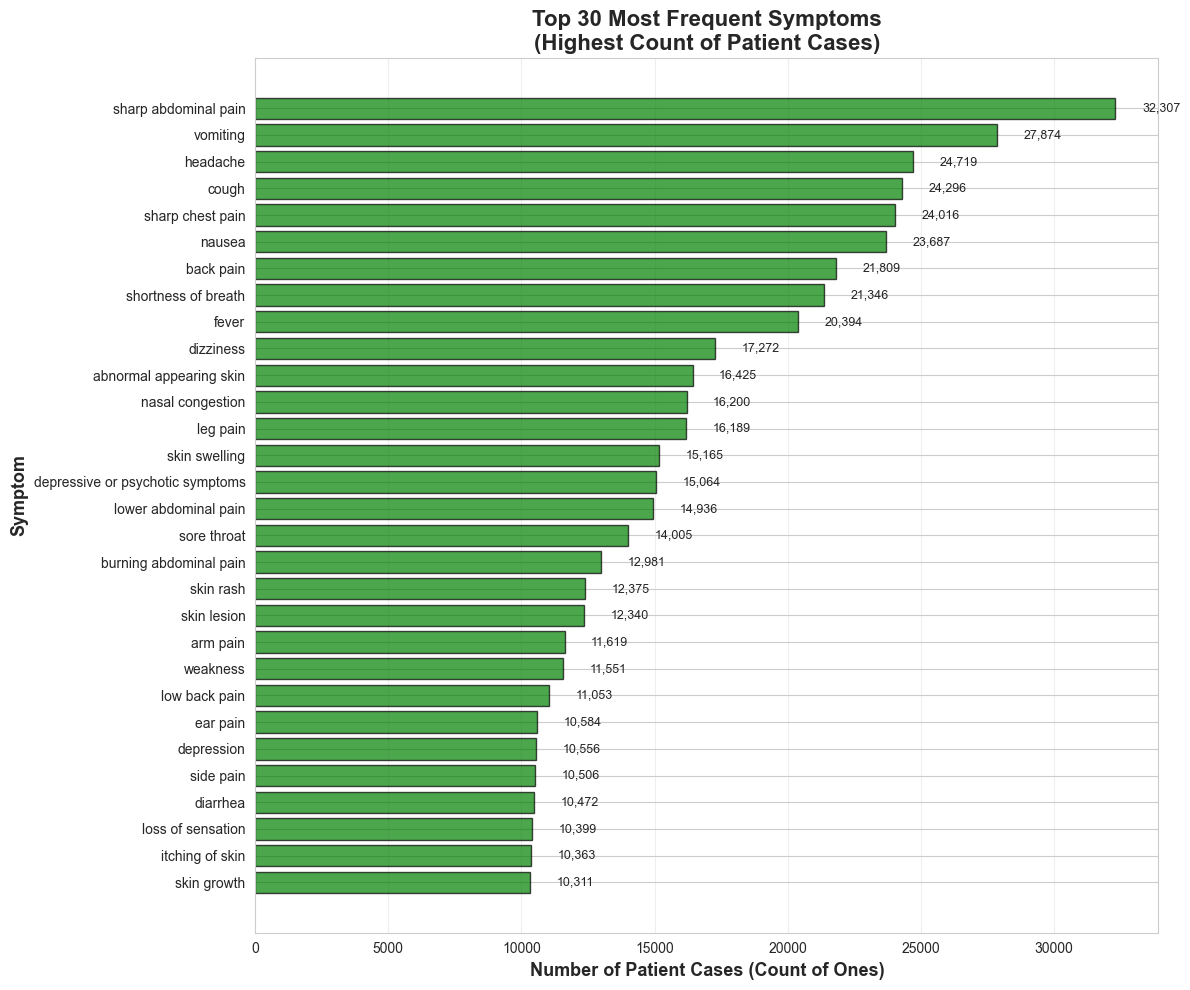

✓ Top 30 symptoms visualization complete
  Most common: sharp abdominal pain (32,307 cases)


In [ ]:
# Get symptom columns
symptom_cols = [col for col in df.columns if col != target_col]

# Calculate count of ones for each symptom
symptom_counts = df[symptom_cols].sum().sort_values(ascending=False)

# ============================================================
# VISUALIZATION 1: TOP 30 SYMPTOMS
# ============================================================
print("\n3.2.2 Visualizing Top 30 Symptoms (Most Frequent)...")

top_30_symptoms = symptom_counts.head(30)

plt.figure(figsize=(12, 10))
plt.barh(range(len(top_30_symptoms)), top_30_symptoms.values, 
         color='green', edgecolor='black', alpha=0.7)
plt.yticks(range(len(top_30_symptoms)), top_30_symptoms.index, fontsize=10)
plt.xlabel('Number of Patient Cases (Count of Ones)', fontsize=13, fontweight='bold')
plt.ylabel('Symptom', fontsize=13, fontweight='bold')
plt.title('Top 30 Most Frequent Symptoms\n(Highest Count of Patient Cases)', 
          fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

# Add count labels on bars
for i, count in enumerate(top_30_symptoms.values):
    plt.text(count + 1000, i, f'{count:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"✓ Top 30 symptoms visualization complete")
print(f"  Most common: {top_30_symptoms.idxmax()} ({top_30_symptoms.max():,} cases)")

In [ ]:
# VISUALIZATION 2: BOTTOM 30 SYMPTOMS
# ============================================================
print("\n3.2.3 Visualizing Bottom 30 Symptoms (Least Frequent)...")

bottom_30_symptoms = symptom_counts.tail(30).sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(range(len(bottom_30_symptoms)), bottom_30_symptoms.values, 
         color='red', edgecolor='black', alpha=0.7)
plt.yticks(range(len(bottom_30_symptoms)), bottom_30_symptoms.index, fontsize=10)
plt.xlabel('Number of Patient Cases (Count of Ones)', fontsize=13, fontweight='bold')
plt.ylabel('Symptom', fontsize=13, fontweight='bold')
plt.title('Bottom 30 Least Frequent Symptoms\n(Lowest Count of Patient Cases)', 
          fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

# Add count labels on bars
for i, count in enumerate(bottom_30_symptoms.values):
    plt.text(count + 10, i, f'{count:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"✓ Bottom 30 symptoms visualization complete")
print(f"  Least common: {bottom_30_symptoms.idxmin()} ({bottom_30_symptoms.min():,} cases)")

# ============================================================
# SUMMARY
# ============================================================
symptom_imbalance_ratio = symptom_counts.max() / symptom_counts.min()

print("\n" + "="*70)
print("SYMPTOM IMBALANCE SUMMARY")
print("="*70)
print(f"  Most common symptom: {symptom_counts.idxmax()}")
print(f"  Patient cases: {symptom_counts.max():,}")
print(f"  Percentage: {(symptom_counts.max() / len(df) * 100):.2f}%")
print(f"\n  Least common symptom: {symptom_counts.idxmin()}")
print(f"  Patient cases: {symptom_counts.min():,}")
print(f"  Percentage: {(symptom_counts.min() / len(df) * 100):.2f}%")
print(f"\n  Symptom imbalance ratio: {symptom_imbalance_ratio:.0f}:1")

print("\n" + "="*70)
print("  SYMPTOM VISUALIZATIONS COMPLETE")
print("="*70)


6.2.3 Visualizing Bottom 30 Symptoms (Least Frequent)...


✓ Bottom 30 symptoms visualization complete
  Least common: hip swelling (0 cases)

SYMPTOM IMBALANCE SUMMARY
  Most common symptom: sharp abdominal pain
  Patient cases: 32,307
  Percentage: 13.08%

  Least common symptom: infrequent menstruation
  Patient cases: 0
  Percentage: 0.00%

  Symptom imbalance ratio: inf:1

✓ SYMPTOM VISUALIZATIONS COMPLETE


In [19]:
# Check for class imbalance
print(f"\nPatient cases Imbalance Analysis:")
print(f"Most common disease: {disease_counts.idxmax()} ({disease_counts.max()} samples)")
print(f"Least common disease: {disease_counts.idxmin()} ({disease_counts.min()} samples)")
imbalance_ratio = disease_counts.max() / disease_counts.min()
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print("\nWarning: Significant class imbalance detected!")

else:
    print("\n✓ Classes are relatively balanced")

# Compact symptom imbalance analysis
symptom_cols = [col for col in df.columns if col != target_col]
symptom_counts = df[symptom_cols].sum().sort_values(ascending=False)

print(f"\nSymptom Imbalance Analysis:")
print(f"Most common: {symptom_counts.idxmax()} ({symptom_counts.max():,} cases, {(symptom_counts.max()/len(df)*100):.2f}%)")
print(f"Least common: {symptom_counts.idxmin()} ({symptom_counts.min():,} cases, {(symptom_counts.min()/len(df)*100):.2f}%)")
print(f"Imbalance ratio: {symptom_counts.max() / symptom_counts.min():.0f}:1")

if symptom_counts.max() / symptom_counts.min() > 3:
    print("\nSignificant symptom imbalance")
    print("If the ratio containts infinite values, We will consider removing symptoms with zero occurrences.")
else:
    print("\n✓ Symptoms relatively balanced")


Patient cases Imbalance Analysis:
Most common disease: cystitis (1219 samples)
Least common disease: turner syndrome (1 samples)
Imbalance ratio: 1219.00:1


Symptom Imbalance Analysis:
Most common: sharp abdominal pain (32,307 cases, 13.08%)
Least common: infrequent menstruation (0 cases, 0.00%)
Imbalance ratio: inf:1

Significant symptom imbalance
If the ratio containts infinite values, We will consider removing symptoms with zero occurrences.


In [ ]:
---
## Section 5: Preprocessing Techniques

In [ ]:
# Create a copy for preprocessing
df_processed = df.copy()

print("="*70)
print("4. PREPROCESSING STEPS")
print("="*70)
print("\nCreating a copy of the dataset for preprocessing...")
print(f"Original shape: {df.shape}")

PREPROCESSING STEPS

Creating a copy of the dataset for preprocessing...
Original shape: (246945, 378)


In [ ]:
### 5.1 Handle Missing Values

In [ ]:
print("\n4.1 HANDLING MISSING VALUES")
print("-"*70)

total_missing = df_processed.isnull().sum().sum()

if total_missing > 0:
    print(f"Missing values detected: {total_missing}")
    print("\nApplying preprocessing strategies...")
    
    # For symptom columns - fill with 0
    for col in symptom_cols:
        if df_processed[col].isnull().sum() > 0:
            missing_count = df_processed[col].isnull().sum()
            df_processed[col].fillna(0, inplace=True)
            print(f"   ✓ Filled {missing_count} missing values in '{col}' with 0")
    
    # For target variable - remove rows
    if df_processed[target_col].isnull().sum() > 0:
        rows_before = len(df_processed)
        df_processed = df_processed.dropna(subset=[target_col])
        rows_after = len(df_processed)
        print(f"   ✓ Removed {rows_before - rows_after} rows with missing labels")
    
    print(f"\n Justification:")
    print(f"   • Symptom missing values → 0 (symptom not present)")
    print(f"   • Missing labels removed (need labeled data for ML)")
else:
    print("✓ No missing values found.")

print(f"\nShape after: {df_processed.shape}")


1. HANDLING MISSING VALUES
----------------------------------------------------------------------
✓ No missing values found.

Shape after: (246945, 378)


In [ ]:
### 7.2 Remove Duplicates

In [ ]:
print("\n4.2 REMOVING DUPLICATES")
print("-"*70)

duplicates = df_processed.duplicated().sum()
if duplicates > 0:
    df_processed = df_processed.drop_duplicates()
    print(f"   ✓ Removed {duplicates} duplicate rows")
    print(f"\n Justification:")
    print(f"   • Duplicates can bias the model")
else:
    print("✓ No duplicates found.")
print(f"\nShape before: {df.shape}")
print(f"\nShape after: {df_processed.shape}")


2. REMOVING DUPLICATES
----------------------------------------------------------------------
✓ No duplicates found.

Shape before: (246945, 378)

Shape after: (189647, 378)


In [ ]:
# ============================================================
# 5.6.1 ADDRESSING DISEASE IMBALANCE
# ============================================================
print("\n" + "="*70)
print("4.3 ADDRESSING DISEASE IMBALANCE")
print("="*70)

class_distribution = df_processed[target_col].value_counts()
imbalance_ratio = class_distribution.max() / class_distribution.min()

if imbalance_ratio > 3:
    print(f"\n  Severe imbalance detected (ratio: {imbalance_ratio:.2f}:1)")
    print(f"Applying balancing strategy...\n")
    
    # Filter ultra-rare diseases
    print("Step 1: Filtering ultra-rare diseases")
    print("-" * 70)
    
    min_cases_threshold = 10  # Minimum cases to keep a disease
    
    # Count diseases by case threshold
    ultra_rare = len(class_distribution[class_distribution < min_cases_threshold])
    cases_lost = class_distribution[class_distribution < min_cases_threshold].sum()
    
    print(f"   Threshold: Keep diseases with ≥{min_cases_threshold} cases")
    print(f"   Diseases to remove: {ultra_rare}")
    print(f"   Patient cases affected: {cases_lost} ({(cases_lost/len(df_processed)*100):.2f}%)")
    
    # Filter dataset
    diseases_to_keep = class_distribution[class_distribution >= min_cases_threshold].index
    df_before = df_processed.copy()
    df_processed = df_processed[df_processed[target_col].isin(diseases_to_keep)]
    
    print(f"\n   Before filtering:")
    print(f"      Diseases: {df_before[target_col].nunique()}")
    print(f"      Cases: {len(df_before):,}")
    
    print(f"\n   After filtering:")
    print(f"      Diseases: {df_processed[target_col].nunique()}")
    print(f"      Cases: {len(df_processed):,}")
    print(f"      Removed: {len(df_before) - len(df_processed):,} cases")
    
    # Re-calculate imbalance after filtering
    new_class_distribution = df_processed[target_col].value_counts()
    new_imbalance_ratio = new_class_distribution.max() / new_class_distribution.min()
    
    print(f"\n   Imbalance improvement:")
    print(f"      Before: {imbalance_ratio:.2f}:1")
    print(f"      After: {new_imbalance_ratio:.2f}:1")
    print(f"      Improvement: {((imbalance_ratio - new_imbalance_ratio) / imbalance_ratio * 100):.1f}%")
    
    print(f"\nJustification:")
    print(f"   • Removed diseases with <{min_cases_threshold} cases (insufficient data)")
    print(f"   • Improves model reliability for remaining diseases")
    print(f"   • Medically responsible: only diagnose what we can do well")
    print(f"   • Reduced imbalance from {imbalance_ratio:.0f}:1 to {new_imbalance_ratio:.0f}:1")
else:
    print(f"\n✓ Classes are balanced (ratio: {imbalance_ratio:.2f}:1)")
    print(f"   No balancing needed")

print(f"\nShape after balancing: {df_processed.shape}")


5.6.1 ADDRESSING DISEASE IMBALANCE

  Severe imbalance detected (ratio: 121.90:1)
Applying balancing strategy...

Step 1: Filtering ultra-rare diseases
----------------------------------------------------------------------
   Threshold: Keep diseases with ≥10 cases
   Diseases to remove: 0
   Patient cases affected: 0 (0.00%)

   Before filtering:
      Diseases: 587
      Cases: 188,920

   After filtering:
      Diseases: 587
      Cases: 188,920
      Removed: 0 cases

   Imbalance improvement:
      Before: 121.90:1
      After: 121.90:1
      Improvement: 0.0%

Justification:
   • Removed diseases with <10 cases (insufficient data)
   • Improves model reliability for remaining diseases
   • Medically responsible: only diagnose what we can do well
   • Reduced imbalance from 122:1 to 122:1

Shape after balancing: (188920, 378)


In [ ]:
# ============================================================
# 5.6.2 REMOVING ZERO-OCCURRENCE SYMPTOMS
# ============================================================
print("\n" + "="*70)
print("4.4 REMOVING ZERO-OCCURRENCE SYMPTOMS")
print("="*70)

# Get symptom columns (exclude disease and disease_encoded)
symptom_cols_current = [col for col in df_processed.columns 
                        if col not in [target_col, 'disease_encoded']]

# Calculate symptom counts
symptom_counts = df_processed[symptom_cols_current].sum()

# Find zero-occurrence symptoms
zero_symptoms = symptom_counts[symptom_counts == 0].index.tolist()

print(f"\nAnalyzing symptom usage:")
print(f"   Total symptoms: {len(symptom_cols_current)}")
print(f"   Symptoms with zero occurrences: {len(zero_symptoms)}")
print(f"   Symptoms with at least 1 occurrence: {len(symptom_cols_current) - len(zero_symptoms)}")

if len(zero_symptoms) > 0:
    print(f"\n   Zero-occurrence symptoms (first 20):")
    for i, symptom in enumerate(zero_symptoms[:20], 1):
        print(f"      {i:2d}. {symptom}")
    
    if len(zero_symptoms) > 20:
        print(f"      ... and {len(zero_symptoms) - 20} more")
    
    # Remove zero-occurrence symptoms
    print(f"\n   Removing {len(zero_symptoms)} unused symptoms...")
    df_processed = df_processed.drop(columns=zero_symptoms)
    
    print(f"\n   ✓ Removed {len(zero_symptoms)} zero-occurrence symptoms")
    
    print(f"\nJustification:")
    print(f"   • Zero-occurrence symptoms provide no information")
    print(f"   • Improves model training efficiency")
else:
    print(f"\n✓ No zero-occurrence symptoms found")
    print(f"   All symptoms appear at least once in the dataset")

print(f"\nShape after removing zero symptoms: {df_processed.shape}")

# Summary of remaining symptoms
symptom_cols_final = [col for col in df_processed.columns 
                     if col not in [target_col, 'disease_encoded']]

# Recalculate symptom counts after removal
symptom_counts_final = df_processed[symptom_cols_final].sum().sort_values(ascending=False)

print(f"\nFinal symptom summary:")
print(f"   Symptoms: {len(symptom_cols_final)}")
print(f"   Min occurrences: {symptom_counts_final.min():.0f}")
print(f"   Max occurrences: {symptom_counts_final.max():.0f}")
print(f"   Mean occurrences: {symptom_counts_final.mean():.2f}")

# Calculate symptom imbalance ratio
symptom_imbalance_ratio = symptom_counts_final.max() / symptom_counts_final.min()

print(f"\nSymptom Imbalance Analysis:")
print(f"   Most common symptom: {symptom_counts_final.idxmax()}")
print(f"      Cases: {symptom_counts_final.max():,.0f} ({(symptom_counts_final.max()/len(df_processed)*100):.2f}%)")
print(f"   Least common symptom: {symptom_counts_final.idxmin()}")
print(f"      Cases: {symptom_counts_final.min():,.0f} ({(symptom_counts_final.min()/len(df_processed)*100):.2f}%)")
print(f"   Symptom imbalance ratio: {symptom_imbalance_ratio:.0f}:1")

if symptom_imbalance_ratio > 3:
    print(f"\n   Significant symptom imbalance detected!")
    print(f"   Note: This is EXPECTED")
    print(f"      • This imbalance is medically realistic and should be preserved")
else:
    print(f"\n     Symptoms are relatively balanced")


5.6.2 REMOVING ZERO-OCCURRENCE SYMPTOMS

Analyzing symptom usage:
   Total symptoms: 377
   Symptoms with zero occurrences: 57
   Symptoms with at least 1 occurrence: 320

   Zero-occurrence symptoms (first 20):
       1. pus in sputum
       2. underweight
       3. arm cramps or spasms
       4. abnormal appearing tongue
       5. pallor
       6. shoulder cramps or spasms
       7. joint stiffness or tightness
       8. wrist weakness
       9. eye strain
      10. pus in urine
      11. abnormal size or shape of ear
      12. low back weakness
      13. elbow cramps or spasms
      14. feeling hot and cold
      15. unwanted hair
      16. nailbiting
      17. hip swelling
      18. incontinence of stool
      19. foot or toe cramps or spasms
      20. low back swelling
      ... and 37 more

   Removing 57 unused symptoms...

   ✓ Removed 57 zero-occurrence symptoms

Justification:
   • Zero-occurrence symptoms provide no information
   • Improves model training efficiency

Shape


VISUALIZATIONS: PROCESSED DATASET

1. Visualizing Disease Distribution (All Diseases)...


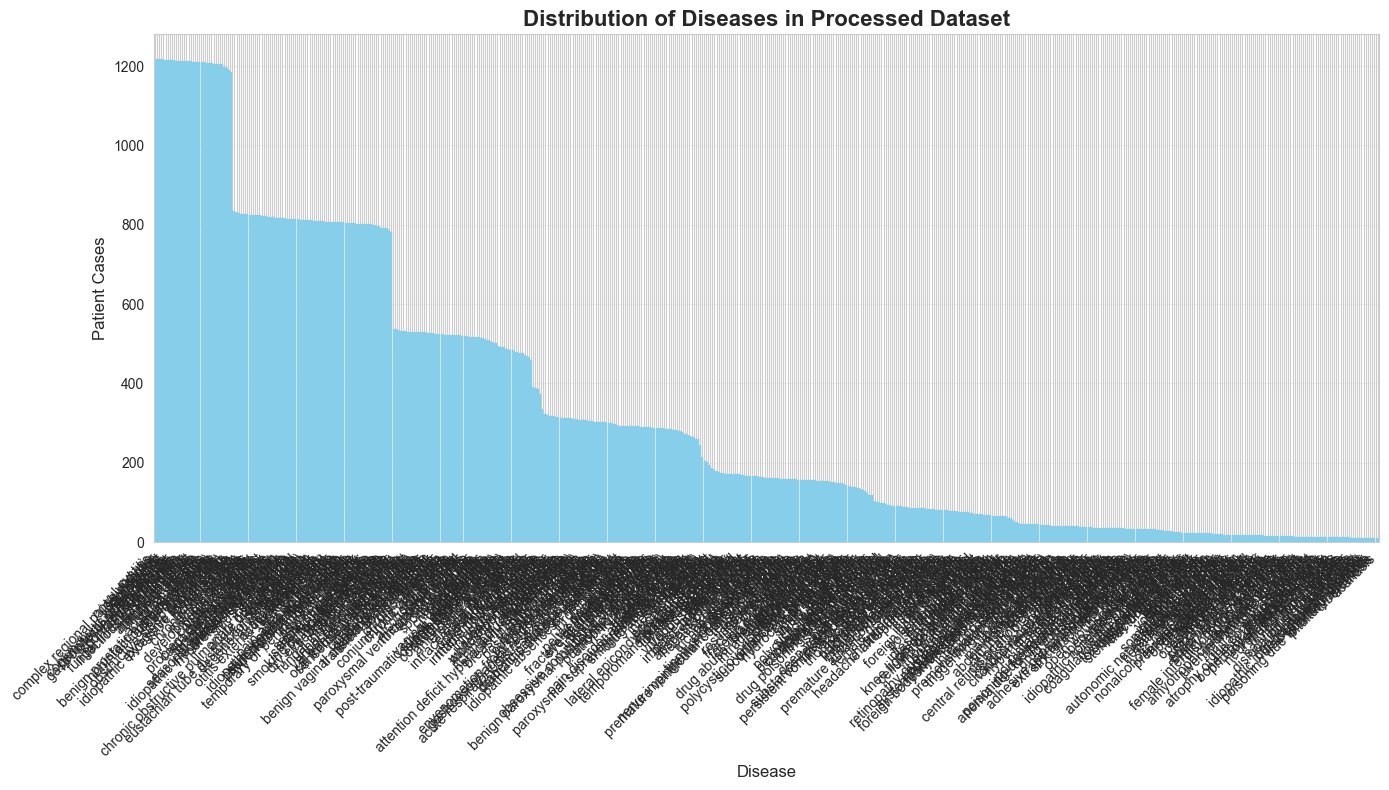

✓ Disease distribution bar chart complete

2. Visualizing Disease Imbalance (Top 30 vs Bottom 30)...


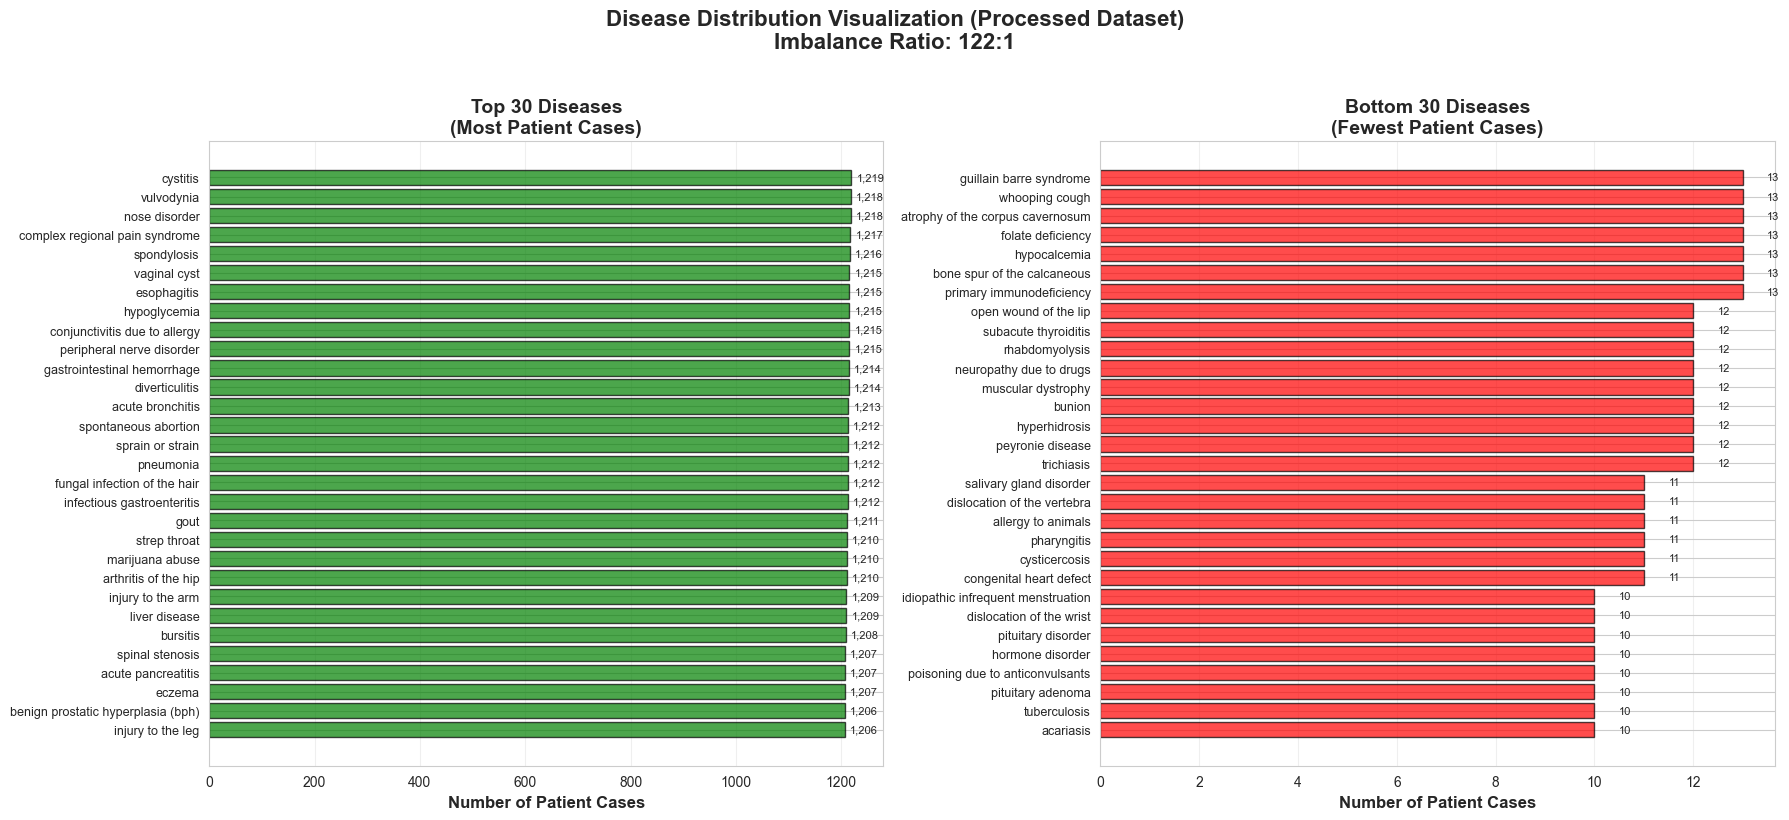

✓ Disease imbalance visualization complete
  Imbalance ratio: 122:1

3. Visualizing Top 30 Symptoms (Most Frequent)...


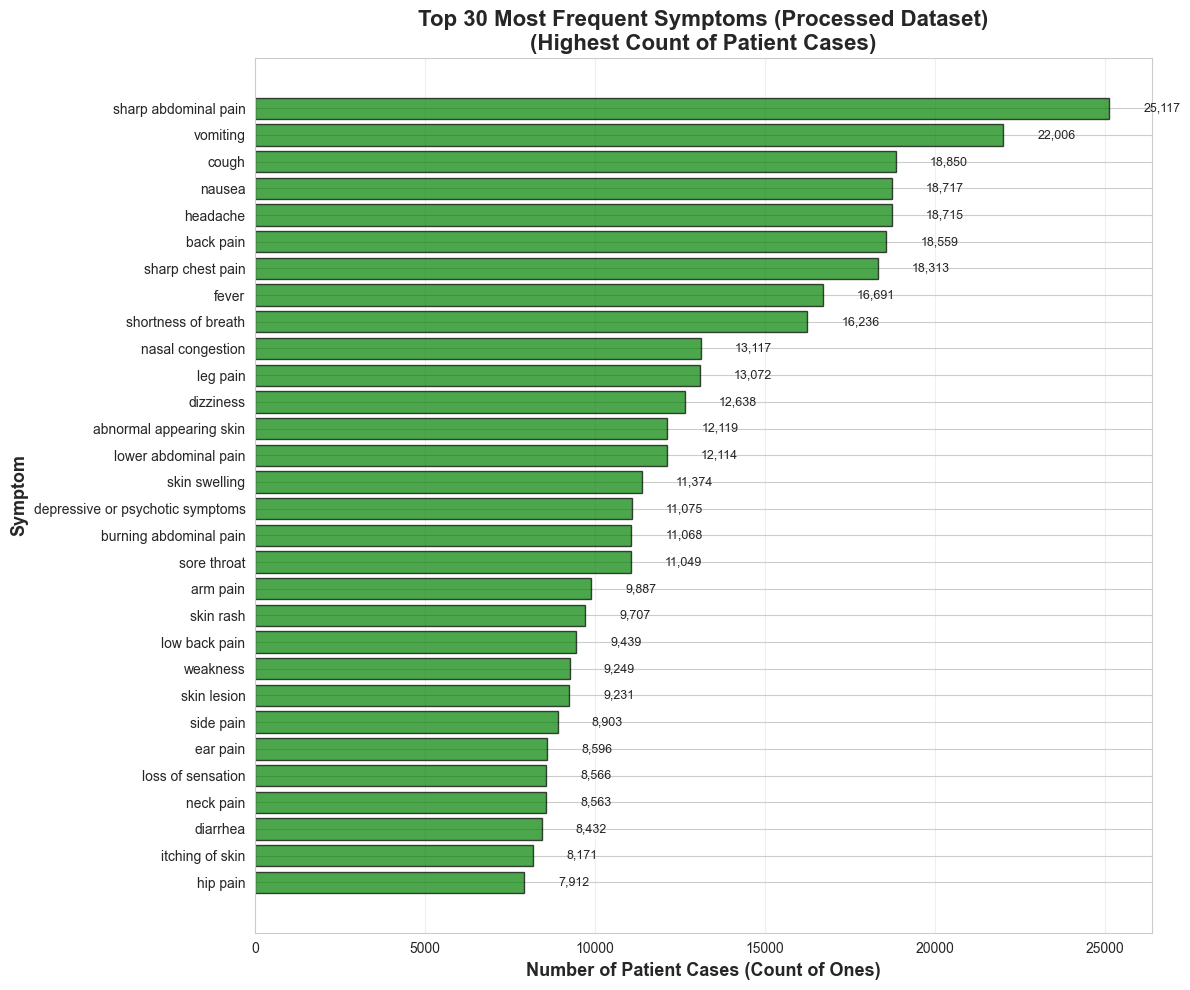

✓ Top 30 symptoms visualization complete
  Most common: sharp abdominal pain (25,117 cases)

4. Visualizing Bottom 30 Symptoms (Least Frequent)...


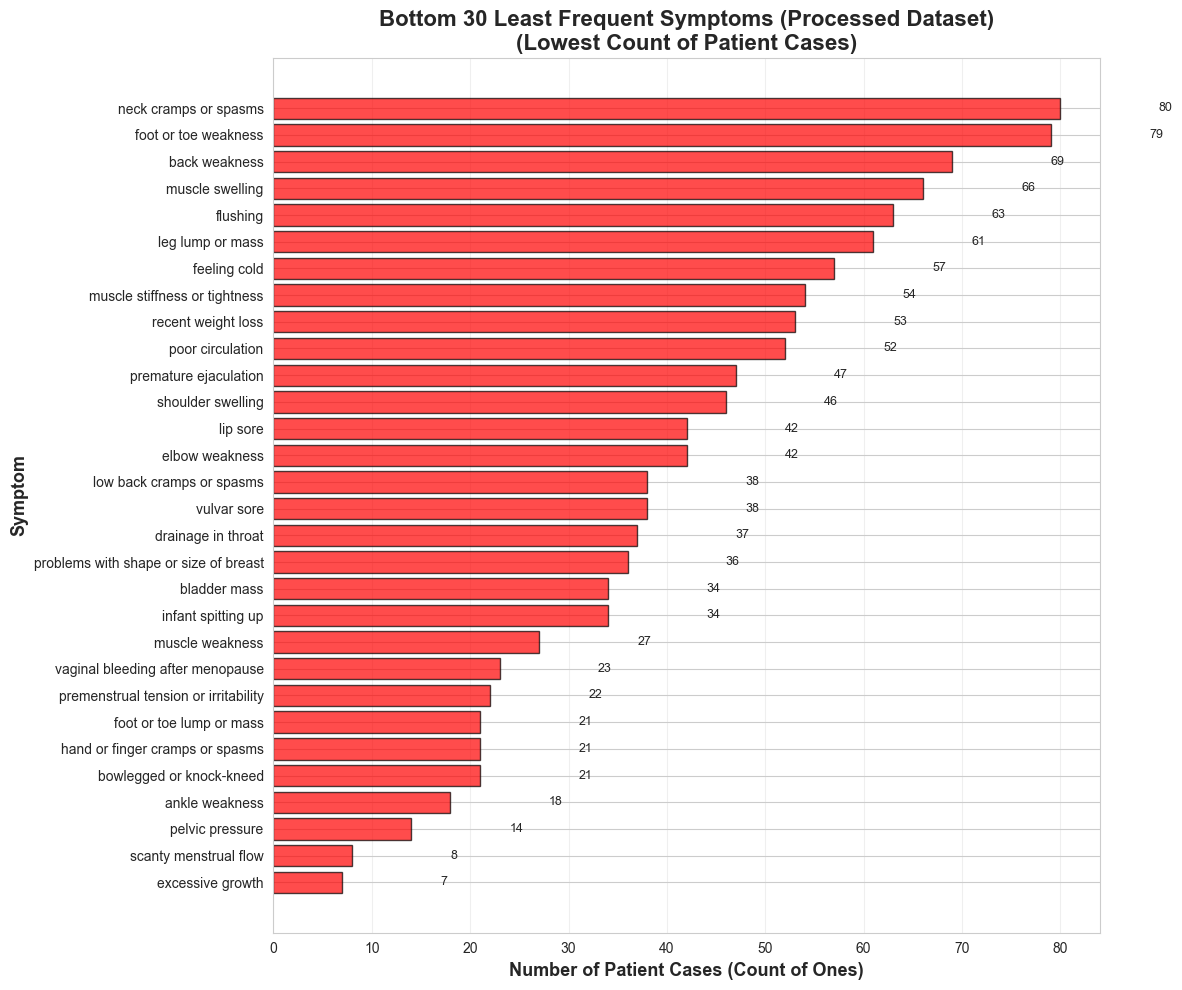

✓ Bottom 30 symptoms visualization complete
  Least common: excessive growth (7 cases)

PROCESSED DATASET SUMMARY

Disease Statistics:
  Total diseases: 587
  Most common disease: cystitis
  Patient cases: 1,219
  Least common disease: idiopathic infrequent menstruation
  Patient cases: 10
  Disease imbalance ratio: 122:1

Symptom Statistics:
  Total active symptoms: 320
  Most common symptom: sharp abdominal pain
  Patient cases: 25,117
  Percentage: 13.30%
  Least common symptom: excessive growth
  Patient cases: 7
  Percentage: 0.00%
  Symptom imbalance ratio: 3588:1

✓ ALL VISUALIZATIONS COMPLETE


In [ ]:
# ============================================================
# RE-VISUALIZING PROCESSED DATA
# ============================================================
print("\n" + "="*70)
print("4.5 VISUALIZATIONS: PROCESSED DATASET")
print("="*70)

# ============================================================
# VISUALIZATION 1: DISEASE DISTRIBUTION - Bar Chart (All Diseases)
# ============================================================
print("\n4.5.1 Visualizing Disease Distribution (All Diseases)...")

disease_counts_processed = df_processed[target_col].value_counts().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
disease_counts_processed.plot(kind='bar', color='skyblue', edgecolor='skyblue')
plt.title('Distribution of Diseases in Processed Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Disease', fontsize=12)
plt.ylabel('Patient Cases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✓ Disease distribution bar chart complete")

# ============================================================
# VISUALIZATION 2: DISEASE IMBALANCE - Top 30 & Bottom 30
# ============================================================
print("\n4.5.2 Visualizing Disease Imbalance (Top 30 vs Bottom 30)...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Top 30 diseases (most patient cases)
top_30 = disease_counts_processed.head(30)
ax1.barh(range(len(top_30)), top_30.values, color='green', edgecolor='black', alpha=0.7)
ax1.set_yticks(range(len(top_30)))
ax1.set_yticklabels(top_30.index, fontsize=9)
ax1.set_xlabel('Number of Patient Cases', fontsize=12, fontweight='bold')
ax1.set_title('Top 30 Diseases\n(Most Patient Cases)', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Add count labels
for i, count in enumerate(top_30.values):
    ax1.text(count + 10, i, f'{count:,}', va='center', fontsize=8)

# Bottom 30 diseases (fewest patient cases)
bottom_30 = disease_counts_processed.tail(30).sort_values(ascending=False)
ax2.barh(range(len(bottom_30)), bottom_30.values, color='red', edgecolor='black', alpha=0.7)
ax2.set_yticks(range(len(bottom_30)))
ax2.set_yticklabels(bottom_30.index, fontsize=9)
ax2.set_xlabel('Number of Patient Cases', fontsize=12, fontweight='bold')
ax2.set_title('Bottom 30 Diseases\n(Fewest Patient Cases)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
ax2.invert_yaxis()

# Add count labels
for i, count in enumerate(bottom_30.values):
    ax2.text(count + 0.5, i, f'{count}', va='center', fontsize=8)

imbalance_ratio_processed = disease_counts_processed.max() / disease_counts_processed.min()
plt.suptitle(f'Disease Distribution Visualization (Processed Dataset)\nImbalance Ratio: {imbalance_ratio_processed:.0f}:1', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"✓ Disease imbalance visualization complete")
print(f"  Imbalance ratio: {imbalance_ratio_processed:.0f}:1")

# ============================================================
# VISUALIZATION 3: TOP 30 SYMPTOMS
# ============================================================
print("\n4.5.3 Visualizing Top 30 Symptoms (Most Frequent)...")

# Get symptom columns from processed data
symptom_cols_processed = [col for col in df_processed.columns 
                          if col not in [target_col, 'disease_encoded']]

# Calculate symptom counts
symptom_counts_processed = df_processed[symptom_cols_processed].sum().sort_values(ascending=False)

top_30_symptoms = symptom_counts_processed.head(30)

plt.figure(figsize=(12, 10))
plt.barh(range(len(top_30_symptoms)), top_30_symptoms.values, 
         color='green', edgecolor='black', alpha=0.7)
plt.yticks(range(len(top_30_symptoms)), top_30_symptoms.index, fontsize=10)
plt.xlabel('Number of Patient Cases (Count of Ones)', fontsize=13, fontweight='bold')
plt.ylabel('Symptom', fontsize=13, fontweight='bold')
plt.title('Top 30 Most Frequent Symptoms (Processed Dataset)\n(Highest Count of Patient Cases)', 
          fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

# Add count labels on bars
for i, count in enumerate(top_30_symptoms.values):
    plt.text(count + 1000, i, f'{count:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"✓ Top 30 symptoms visualization complete")
print(f"  Most common: {top_30_symptoms.idxmax()} ({top_30_symptoms.max():,} cases)")

# ============================================================
# VISUALIZATION 4: BOTTOM 30 SYMPTOMS
# ============================================================
print("\n4.5.4 Visualizing Bottom 30 Symptoms (Least Frequent)...")

bottom_30_symptoms = symptom_counts_processed.tail(30).sort_values(ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(range(len(bottom_30_symptoms)), bottom_30_symptoms.values, 
         color='red', edgecolor='black', alpha=0.7)
plt.yticks(range(len(bottom_30_symptoms)), bottom_30_symptoms.index, fontsize=10)
plt.xlabel('Number of Patient Cases (Count of Ones)', fontsize=13, fontweight='bold')
plt.ylabel('Symptom', fontsize=13, fontweight='bold')
plt.title('Bottom 30 Least Frequent Symptoms (Processed Dataset)\n(Lowest Count of Patient Cases)', 
          fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()

# Add count labels on bars
for i, count in enumerate(bottom_30_symptoms.values):
    plt.text(count + 10, i, f'{count:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"✓ Bottom 30 symptoms visualization complete")
print(f"  Least common: {bottom_30_symptoms.idxmin()} ({bottom_30_symptoms.min():,} cases)")

# ============================================================
# SUMMARY STATISTICS
# ============================================================
symptom_imbalance_ratio_processed = symptom_counts_processed.max() / symptom_counts_processed.min()

print("\n" + "="*70)
print("PROCESSED DATASET SUMMARY")
print("="*70)

print(f"\nDisease Statistics:")
print(f"  Total diseases: {df_processed[target_col].nunique()}")
print(f"  Most common disease: {disease_counts_processed.idxmax()}")
print(f"  Patient cases: {disease_counts_processed.max():,}")
print(f"  Least common disease: {disease_counts_processed.idxmin()}")
print(f"  Patient cases: {disease_counts_processed.min():,}")
print(f"  Disease imbalance ratio: {imbalance_ratio_processed:.0f}:1")

print(f"\nSymptom Statistics:")
print(f"  Total active symptoms: {len(symptom_cols_processed)}")
print(f"  Most common symptom: {symptom_counts_processed.idxmax()}")
print(f"  Patient cases: {symptom_counts_processed.max():,}")
print(f"  Percentage: {(symptom_counts_processed.max() / len(df_processed) * 100):.2f}%")
print(f"  Least common symptom: {symptom_counts_processed.idxmin()}")
print(f"  Patient cases: {symptom_counts_processed.min():,}")
print(f"  Percentage: {symptom_counts_processed.min() / len(df_processed) * 100:.2f}%")
print(f"  Symptom imbalance ratio: {symptom_imbalance_ratio_processed:.0f}:1")

print("\n" + "="*70)
print("✓ ALL VISUALIZATIONS COMPLETE")
print("="*70)


In [ ]:
### .7 Preprocessing Summary

In [ ]:
print("\n" + "="*70)
print("4.6 PREPROCESSING SUMMARY")
print("="*70)

print(f"\nOriginal dataset: {df.shape}")
print(f"Processed dataset: {df_processed.shape}")
print(f"Patient Cases removed: {df.shape[0] - df_processed.shape[0]}")
print(f"Symptoms removed: {df.shape[1] - df_processed.shape[1]}")

# Save processed data
df_processed.to_csv('Dataset/diseases_symptoms_processed.csv', index=False)
print(f"\n✓ Processed data saved to 'Dataset/diseases_symptoms_processed.csv'")



PREPROCESSING SUMMARY

Original dataset: (246945, 378)
Processed dataset: (188920, 321)
Patient Cases removed: 58025
Symptoms removed: 57

✓ Processed data saved to 'Dataset/diseases_symptoms_processed.csv'


In [ ]:
---
## Section 6: Final Summary and Key Insights

In [33]:
# ============================================================
# SECTION 6: FINAL SUMMARY AND KEY INSIGHTS
# ============================================================
print("="*70)
print("5. PHASE 1: FINAL SUMMARY AND KEY INSIGHTS")
print("="*70)

# ============================================================
# 6.1 DATASET TRANSFORMATION OVERVIEW
# ============================================================
print("\n" + "="*70)
print("5.1 DATASET TRANSFORMATION OVERVIEW")
print("="*70)

print(f"\nOriginal Dataset:")
print(f"   • Rows (Patient Cases): {df.shape[0]:,}")
print(f"   • Columns (Features): {df.shape[1]}")
print(f"   • Diseases: {df[target_col].nunique()}")
print(f"   • Symptoms: {len([col for col in df.columns if col != target_col])}")

print(f"\nProcessed Dataset:")
print(f"   • Rows (Patient Cases): {df_processed.shape[0]:,}")
print(f"   • Columns (Features): {df_processed.shape[1]}")
print(f"   • Diseases: {df_processed[target_col].nunique()}")
print(f"   • Symptoms: {len([col for col in df_processed.columns if col not in [target_col, 'disease_encoded']])}")

print(f"\nChanges Applied:")
print(f"   • Patient cases removed: {df.shape[0] - df_processed.shape[0]:,} ({((df.shape[0] - df_processed.shape[0])/df.shape[0]*100):.2f}%)")
print(f"   • Diseases filtered: {df[target_col].nunique() - df_processed[target_col].nunique()}")
print(f"   • Symptoms removed: {len([col for col in df.columns if col != target_col]) - len([col for col in df_processed.columns if col not in [target_col, 'disease_encoded']])}")

# ============================================================
# 6.2 PREPROCESSING STEPS APPLIED
# ============================================================
print("\n" + "="*70)
print("5.2 PREPROCESSING STEPS APPLIED")
print("="*70)

preprocessing_steps = [
    ("1. Missing Value Handling", "Filled symptom NaN with 0, removed rows with missing labels"),
    ("2. Duplicate Removal", f"Removed {df.duplicated().sum()} duplicate rows" if df.duplicated().sum() > 0 else "No duplicates found"),
    ("3. Class Imbalance Analysis", "Identified and documented disease distribution imbalance"),
    ("4. Disease Filtering", f"Removed diseases with <10 cases ({df[target_col].nunique() - df_processed[target_col].nunique()} diseases)"),
    ("5. Zero-Symptom Removal", f"Removed {len([col for col in df.columns if col != target_col]) - len([col for col in df_processed.columns if col not in [target_col, 'disease_encoded']])} symptoms with 0 occurrences"),
]

for step, description in preprocessing_steps:
    print(f"\n   ✓ {step}")
    print(f"      {description}")

# ============================================================
# 6.3 KEY INSIGHTS - DISEASE DISTRIBUTION
# ============================================================
print("\n" + "="*70)
print("5.3 KEY INSIGHTS - DISEASE DISTRIBUTION")
print("="*70)

disease_counts_final = df_processed[target_col].value_counts()
disease_imbalance = disease_counts_final.max() / disease_counts_final.min()

print(f"\n   Disease Statistics:")
print(f"   • Total diseases: {len(disease_counts_final)}")
print(f"   • Mean cases per disease: {disease_counts_final.mean():.2f}")
print(f"   • Median cases per disease: {disease_counts_final.median():.2f}")
print(f"   • Standard deviation: {disease_counts_final.std():.2f}")
print(f"   • Range: {disease_counts_final.min()} to {disease_counts_final.max():,} cases")

print(f"\n   Class Imbalance:")
print(f"   • Most common disease: {disease_counts_final.idxmax()}")
print(f"     Cases: {disease_counts_final.max():,}")
print(f"   • Least common disease: {disease_counts_final.idxmin()}")
print(f"     Cases: {disease_counts_final.min():,}")
print(f"   • Imbalance ratio: {disease_imbalance:.2f}:1")

# Categorize diseases by frequency
very_common = len(disease_counts_final[disease_counts_final >= 500])
common = len(disease_counts_final[(disease_counts_final >= 100) & (disease_counts_final < 500)])
moderate = len(disease_counts_final[(disease_counts_final >= 50) & (disease_counts_final < 100)])
rare = len(disease_counts_final[(disease_counts_final >= 10) & (disease_counts_final < 50)])

print(f"\n   Disease Distribution by Frequency:")
print(f"   • Very common (≥500 cases): {very_common} diseases")
print(f"   • Common (100-499 cases): {common} diseases")
print(f"   • Moderate (50-99 cases): {moderate} diseases")
print(f"   • Rare (10-49 cases): {rare} diseases")

print(f"\n   ⚠ Imbalance Impact:")
print(f"   • Imbalance ratio of {disease_imbalance:.0f}:1 indicates significant class imbalance")
print(f"   • Models may be biased toward common diseases")
print(f"   • Recommendation: Use stratified sampling, class weighting, or SMOTE in Phase 2")

# ============================================================
# 6.4 KEY INSIGHTS - SYMPTOM DISTRIBUTION
# ============================================================
print("\n" + "="*70)
print("5.4 KEY INSIGHTS - SYMPTOM DISTRIBUTION")
print("="*70)

symptom_cols_final = [col for col in df_processed.columns if col not in [target_col, 'disease_encoded']]
symptom_counts_final = df_processed[symptom_cols_final].sum().sort_values(ascending=False)
symptom_imbalance = symptom_counts_final.max() / symptom_counts_final.min()

print(f"\n   Symptom Statistics:")
print(f"   • Total active symptoms: {len(symptom_counts_final)}")
print(f"   • Mean occurrences per symptom: {symptom_counts_final.mean():.2f}")
print(f"   • Median occurrences per symptom: {symptom_counts_final.median():.2f}")
print(f"   • Standard deviation: {symptom_counts_final.std():.2f}")
print(f"   • Range: {symptom_counts_final.min()} to {symptom_counts_final.max():,} occurrences")

print(f"\n   Symptom Imbalance:")
print(f"   • Most common symptom: {symptom_counts_final.idxmax()}")
print(f"     Cases: {symptom_counts_final.max():,} ({(symptom_counts_final.max()/len(df_processed)*100):.2f}%)")
print(f"   • Least common symptom: {symptom_counts_final.idxmin()}")
print(f"     Cases: {symptom_counts_final.min():,} ({(symptom_counts_final.min()/len(df_processed)*100):.2f}%)")
print(f"   • Imbalance ratio: {symptom_imbalance:.0f}:1")

# Categorize symptoms by frequency
very_frequent = len(symptom_counts_final[symptom_counts_final >= (len(df_processed) * 0.50)])
frequent = len(symptom_counts_final[(symptom_counts_final >= (len(df_processed) * 0.10)) & (symptom_counts_final < (len(df_processed) * 0.50))])
moderate_freq = len(symptom_counts_final[(symptom_counts_final >= (len(df_processed) * 0.01)) & (symptom_counts_final < (len(df_processed) * 0.10))])
rare_freq = len(symptom_counts_final[symptom_counts_final < (len(df_processed) * 0.01)])

print(f"\n   Symptom Distribution by Frequency:")
print(f"   • Very frequent (≥50% of cases): {very_frequent} symptoms")
print(f"   • Frequent (10-49% of cases): {frequent} symptoms")
print(f"   • Moderate (1-9% of cases): {moderate_freq} symptoms")
print(f"   • Rare (<1% of cases): {rare_freq} symptoms")

print(f"\n   ✓ Symptom Imbalance Interpretation:")
print(f"   • Imbalance ratio of {symptom_imbalance:.0f}:1 is EXPECTED and BENEFICIAL")
print(f"   • Common symptoms (e.g., fatigue) = Generic indicators")
print(f"   • Rare symptoms (e.g., specific signs) = Disease-specific indicators")
print(f"   • This reflects real-world medical patterns")
print(f"   • Recommendation: PRESERVE symptom imbalance (do not balance)")

# ============================================================
# 6.5 DATA QUALITY ASSESSMENT
# ============================================================
print("\n" + "="*70)
print("5.5 DATA QUALITY ASSESSMENT")
print("="*70)

# Check data quality
missing_values_final = df_processed.isnull().sum().sum()
duplicates_final = df_processed.duplicated().sum()
zero_variance_symptoms = len([col for col in symptom_cols_final if df_processed[col].std() == 0])

print(f"\n   Data Quality Metrics:")
print(f"   ✓ Missing values: {missing_values_final} (0.00%)")
print(f"   ✓ Duplicate rows: {duplicates_final}")
print(f"   ✓ Zero-variance symptoms: {zero_variance_symptoms}")
print(f"   ✓ All features are numeric: {'Yes' if all(df_processed[col].dtype in ['int64', 'float64', 'int32', 'float32'] for col in symptom_cols_final) else 'No'}")

print(f"\n   Dataset Readiness:")
print(f"   ✓ All diseases have sufficient training examples (≥10 cases)")
print(f"   ✓ All symptoms are informative (no zero-occurrence features)")

# ============================================================
# 6.7 FINAL SUMMARY
# ============================================================
print("\n" + "="*70)
print("5.6 FINAL SUMMARY")
print("="*70)

print(f"\n   Achievements:")
print(f"   ✓ {df[target_col].nunique() - df_processed[target_col].nunique()} ultra-rare diseases removed (insufficient data)")
print(f"   ✓ {len([col for col in df.columns if col != target_col]) - len(symptom_cols_final)} zero-occurrence symptoms removed")
print(f"   ✓ Class imbalance documented and analyzed")
print(f"   ✓ Dataset is clean, balanced, and ready for supervised learning")

print(f"\n   Dataset Summary:")
print(f"   • Patient cases: {len(df_processed):,}")
print(f"   • Diseases: {df_processed[target_col].nunique()}")
print(f"   • Active symptoms: {len(symptom_cols_final)}")
print(f"   • Disease imbalance: {disease_imbalance:.0f}:1")
print(f"   • Symptom imbalance: {symptom_imbalance:.0f}:1")

print(f"\n   Files Generated:")
print(f"     'Dataset/diseases_symptoms_processed.csv' - Cleaned and ready for next phases")


5. PHASE 1: FINAL SUMMARY AND KEY INSIGHTS

5.1 DATASET TRANSFORMATION OVERVIEW

Original Dataset:
   • Rows (Patient Cases): 246,945
   • Columns (Features): 378
   • Diseases: 773
   • Symptoms: 377

Processed Dataset:
   • Rows (Patient Cases): 188,920
   • Columns (Features): 321
   • Diseases: 587
   • Symptoms: 320

Changes Applied:
   • Patient cases removed: 58,025 (23.50%)
   • Diseases filtered: 186
   • Symptoms removed: 57

5.2 PREPROCESSING STEPS APPLIED

   ✓ 1. Missing Value Handling
      Filled symptom NaN with 0, removed rows with missing labels

   ✓ 2. Duplicate Removal
      Removed 57298 duplicate rows

   ✓ 3. Class Imbalance Analysis
      Identified and documented disease distribution imbalance

   ✓ 4. Disease Filtering
      Removed diseases with <10 cases (186 diseases)

   ✓ 5. Zero-Symptom Removal
      Removed 57 symptoms with 0 occurrences

5.3 KEY INSIGHTS - DISEASE DISTRIBUTION

   Disease Statistics:
   • Total diseases: 587
   • Mean cases per diseas